## **<u>Multiple Correspondence Analysis (MCA)</u>**  ##

- Subset of PCA
- Use Multiple Correspondence Analysis (MCA) for Categorical data

Age group: {'20-30': 0, '31-40': 1, '41-50': 2, '51-60': 3}
Gender: {'Female': 0, 'Male': 1, 'Prefer not to say': 2}
Marital status: {'Married with children': 0, 'Married with no children': 1, 'Single': 2}
Deciding factors to buy car: {'-': 0, 'Aesthetics;Functionality;Customisable options': 1, 'Brand name;Aesthetics;Functionality;Size': 2, 'Brand name;Technological features;Functionality;Customisable options': 3, 'Brand name;Technological features;Functionality;Sustainability/environment considerations': 4, 'Price': 5, 'Price;Aesthetics': 6, 'Price;Aesthetics;Size': 7, 'Price;Aesthetics;Technological features': 8, 'Price;Aesthetics;Technological features;Customisable options;Sustainability/environment considerations': 9, 'Price;Aesthetics;Technological features;Functionality': 10, 'Price;Aesthetics;Technological features;Functionality;Sustainability/environment considerations': 11, 'Price;Brand name;Aesthetics': 12, 'Price;Brand name;Aesthetics;Functionality;Size': 13, 'Price;Brand na

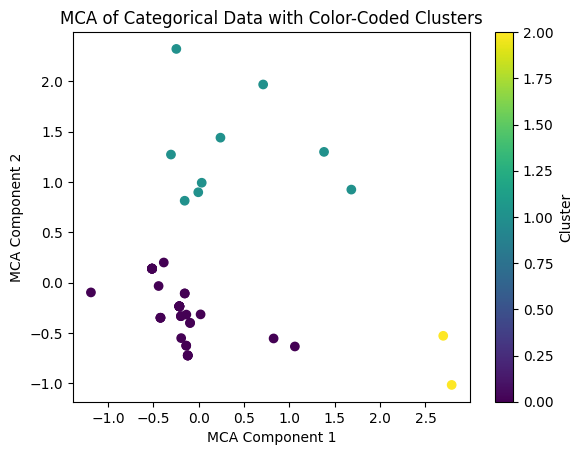

          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.543         6.04%                      6.04%
1              0.500         5.56%                     11.59%


In [23]:
import pandas as pd
from prince import MCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans  # Example clustering algorithm

# Load the dataset
df = pd.read_csv('../data/cleaned_data.csv')

# Extracting categorical columns
categorical_cols = ['Age group', 'Gender', 'Marital status', 'Deciding factors to buy car', 'Any cadding experience']

# Applying LabelEncoder to transform categorical columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
    print(f"{col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Extract only the categorical columns for MCA
data_for_mca = df[categorical_cols]

# Instantiate and fit MCA
mca = MCA(n_components=2)
mca.fit(data_for_mca)

# Transform the data
X_mca = mca.transform(data_for_mca)

# Example: Cluster the data using KMeans (replace this with your clustering logic)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_mca)

# Plot the MCA results with color-coded clusters
plt.scatter(X_mca.iloc[:, 0], X_mca.iloc[:, 1], c=df['Cluster'], cmap='viridis')  # Adjust cmap as needed
plt.xlabel('MCA Component 1')
plt.ylabel('MCA Component 2')
plt.title('MCA of Categorical Data with Color-Coded Clusters')
plt.colorbar(label='Cluster')
plt.show()

# Eigenvalues summary
print(mca.eigenvalues_summary)


Age group: {'20-30': 0, '31-40': 1, '41-50': 2, '51-60': 3}
Gender: {'Female': 0, 'Male': 1, 'Prefer not to say': 2}
Marital status: {'Married with children': 0, 'Married with no children': 1, 'Single': 2}
Deciding factors to buy car: {'-': 0, 'Aesthetics;Functionality;Customisable options': 1, 'Brand name;Aesthetics;Functionality;Size': 2, 'Brand name;Technological features;Functionality;Customisable options': 3, 'Brand name;Technological features;Functionality;Sustainability/environment considerations': 4, 'Price': 5, 'Price;Aesthetics': 6, 'Price;Aesthetics;Size': 7, 'Price;Aesthetics;Technological features': 8, 'Price;Aesthetics;Technological features;Customisable options;Sustainability/environment considerations': 9, 'Price;Aesthetics;Technological features;Functionality': 10, 'Price;Aesthetics;Technological features;Functionality;Sustainability/environment considerations': 11, 'Price;Brand name;Aesthetics': 12, 'Price;Brand name;Aesthetics;Functionality;Size': 13, 'Price;Brand na

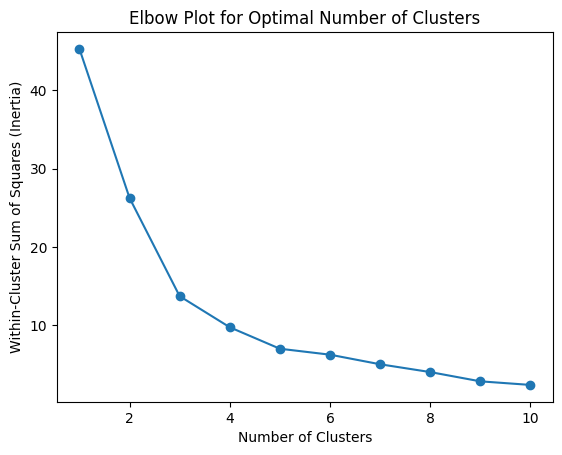

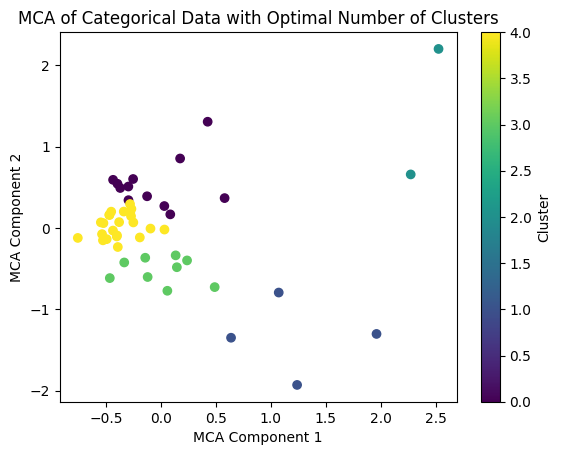

          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.490         5.06%                      5.06%
1              0.416         4.30%                      9.37%


In [27]:
import pandas as pd
from prince import MCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import numpy as np

df = pd.read_csv('../data/cleaned_data.csv')

categorical_cols = ['Age group', 'Gender', 'Marital status', 
                    'Deciding factors to buy car', 'Any cadding experience', 
                    'Category', 'Likelihood of customised vehicle if FOC',
                    'Exterior components to customise', 'Interior components to customise']

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
    print(f"{col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Extract only the categorical columns for MCA
data_for_mca = df[categorical_cols]

# Instantiate and fit MCA
mca = MCA(n_components=2)
mca.fit(data_for_mca)

# Transform the data
X_mca = mca.transform(data_for_mca)

# Elbow plot to determine the optimal number of clusters
inertia_values = []
for i in range(1, 11):  # Trying clusters from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_mca)
    inertia_values.append(kmeans.inertia_)

# Plotting the elbow plot
plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Plot for Optimal Number of Clusters')
plt.show()

# Choose the optimal number of clusters based on the elbow plot
optimal_clusters = 5  

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_mca)

# Plot the MCA results with color-coded clusters
plt.scatter(X_mca.iloc[:, 0], X_mca.iloc[:, 1], c=df['Cluster'], cmap='viridis')
plt.xlabel('MCA Component 1')
plt.ylabel('MCA Component 2')
plt.title('MCA of Categorical Data with Optimal Number of Clusters')
plt.colorbar(label='Cluster')
plt.show()

# Eigenvalues summary
print(mca.eigenvalues_summary)


Age group: {'20-30': 0, '31-40': 1, '41-50': 2, '51-60': 3}
Gender: {'Female': 0, 'Male': 1, 'Prefer not to say': 2}
Marital status: {'Married with children': 0, 'Married with no children': 1, 'Single': 2}
TOTAL PARTS: {2: 0, 3: 1, 4: 2, 5: 3, 6: 4, 7: 5, 8: 6, 9: 7}
Any cadding experience: {'No, I would need a designer to model my sketch': 0, 'Yes, I can design on my own': 1}
number factors to buy car: {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7}


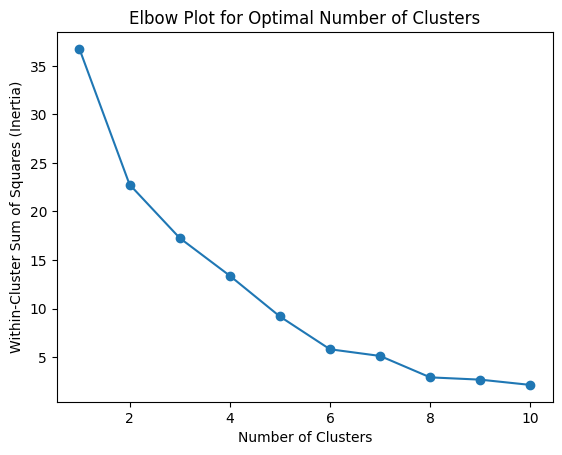

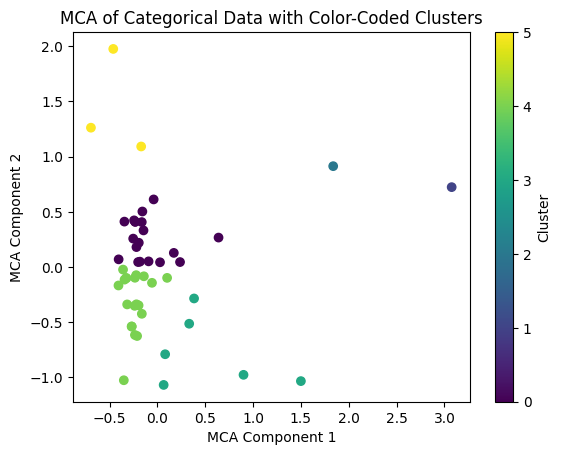

Cluster Profiles:
         Age group  Gender  Marital status  TOTAL PARTS  \
Cluster                                                   
0                0       1               2            2   
1                2       0               1            7   
2                0       0               2            7   
3                0       1               2            0   
4                0       1               2            3   
5                3       0               0            2   

        Any cadding experience number factors to buy car  
Cluster                                                   
0                            0                         5  
1                            0                         7  
2                            0                         7  
3                       [0, 1]                         0  
4                       [0, 1]                         4  
5                            0                 [2, 3, 5]  


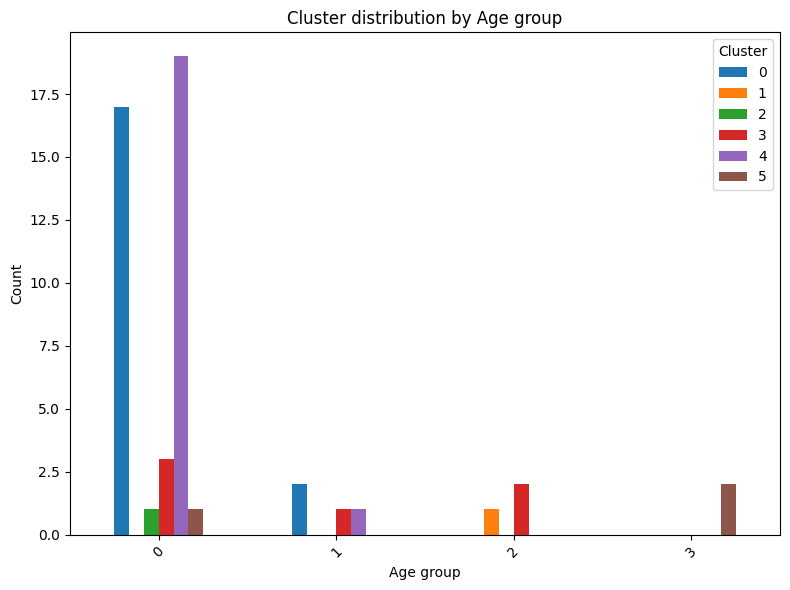

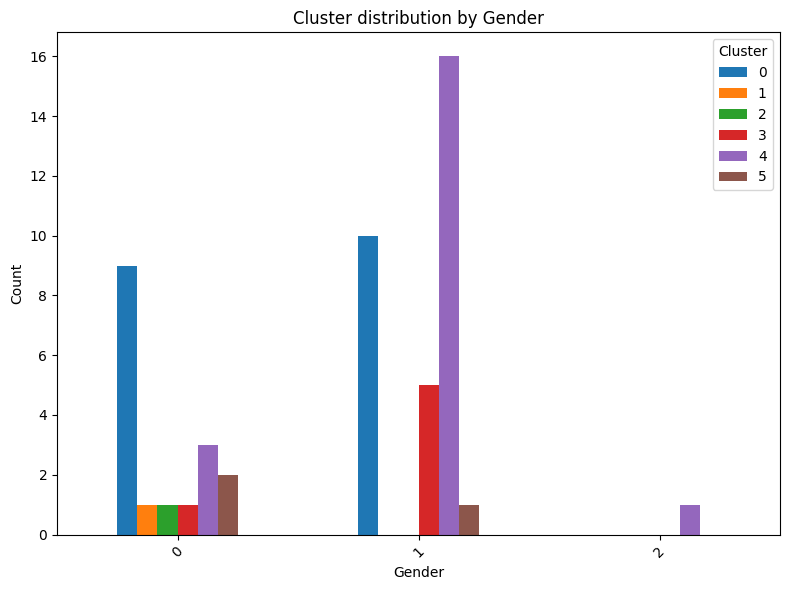

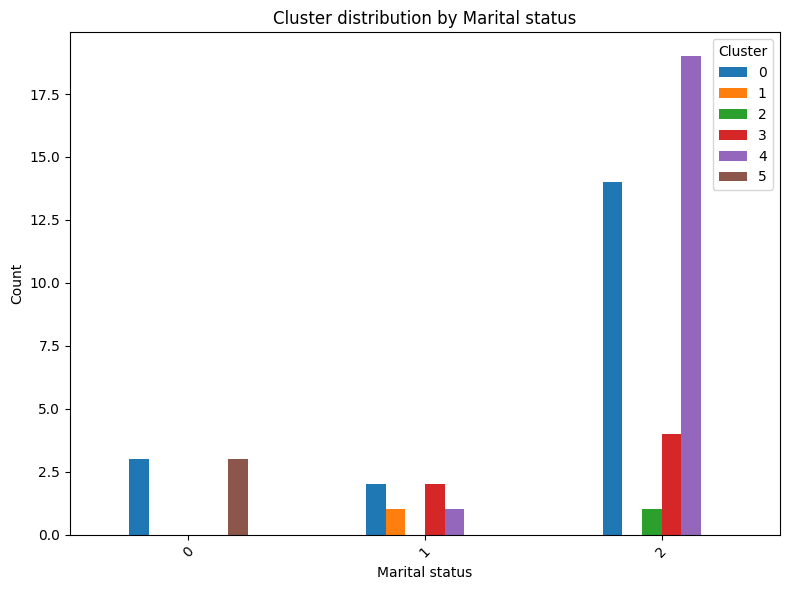

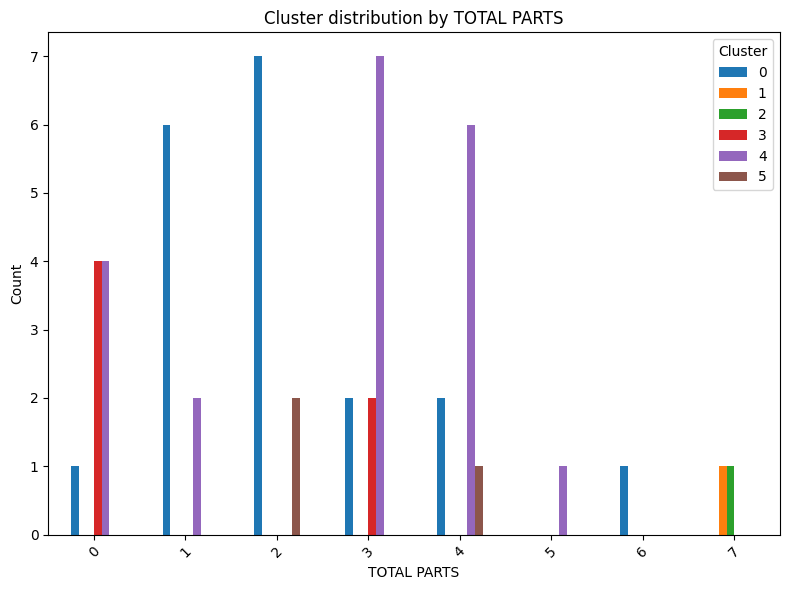

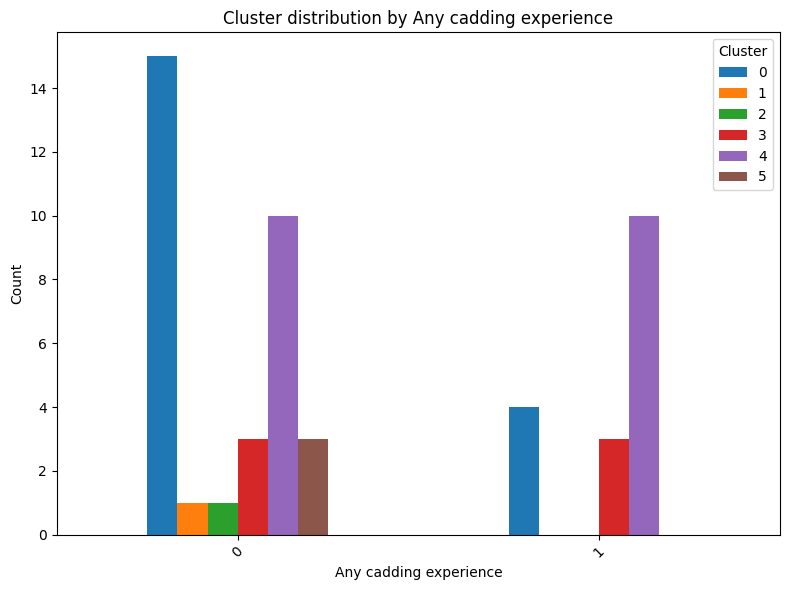

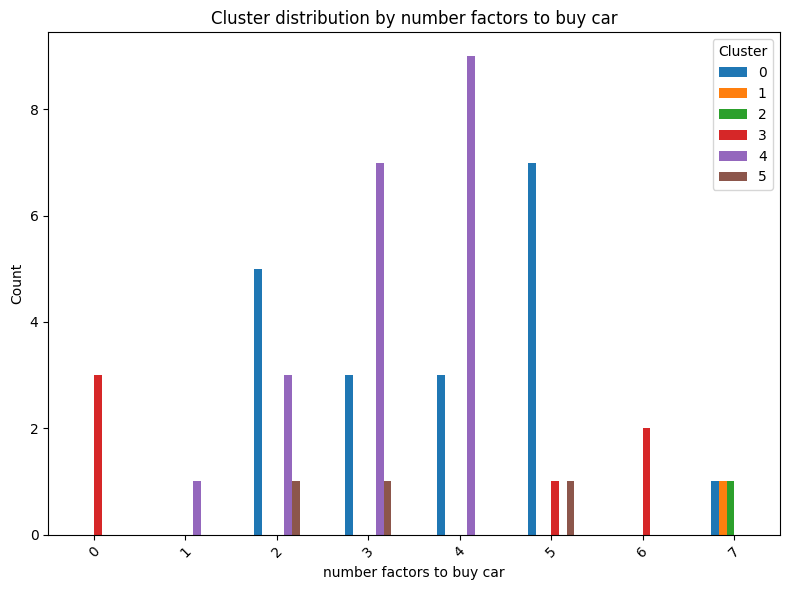

Chi-Square Test Results:
Age group: p-value = 2.0952587611206417e-07
Gender: p-value = 0.29103803424194175
Marital status: p-value = 5.319753316424824e-05
TOTAL PARTS: p-value = 2.0828644500543727e-06
Any cadding experience: p-value = 0.22353792883863638
number factors to buy car: p-value = 7.595852060038009e-07


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from prince import MCA
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from scipy.stats import chi2_contingency

# Load the dataset
df = pd.read_csv('../data/cleaned_data.csv')

df['TOTAL PARTS'] = df.apply(lambda row: len(row['Exterior components to customise'].split(';')) + len(row['Interior components to customise'].split(';')), axis=1)
df['number factors to buy car'] = df.apply(lambda row: len(row['Deciding factors to buy car'].split(';')), axis=1)


# Field names of categorical columns
categorical_cols = ['Age group', 'Gender', 'Marital status', 'TOTAL PARTS', 'Any cadding experience', 'number factors to buy car']

# Apply LabelEncoder
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
    print(f"{col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Extract categorical columns for MCA
data_for_mca = df[categorical_cols]

# Perform MCA
mca = MCA(n_components=2)
mca.fit(data_for_mca)
X_mca = mca.transform(data_for_mca)


# Elbow plot to determine the optimal number of clusters
inertia_values = []
for i in range(1, 11):  # Trying clusters from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_mca)
    inertia_values.append(kmeans.inertia_)

# Plotting the elbow plot
plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Plot for Optimal Number of Clusters')
plt.show()

# KMeans clustering
kmeans = KMeans(n_clusters=6, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_mca)

# MCA plot with clusters
plt.scatter(X_mca.iloc[:, 0], X_mca.iloc[:, 1], c=df['Cluster'], cmap='viridis')
plt.xlabel('MCA Component 1')
plt.ylabel('MCA Component 2')
plt.title('MCA of Categorical Data with Color-Coded Clusters')
plt.colorbar(label='Cluster')
plt.show()

# Cluster profiles
df['MCA1'] = X_mca.iloc[:, 0]
df['MCA2'] = X_mca.iloc[:, 1]
cluster_profiles = df.groupby('Cluster')[categorical_cols].agg(pd.Series.mode)
print("Cluster Profiles:")
print(cluster_profiles)

# Visualize cluster distributions for each categorical column
for col in categorical_cols:
    pd.crosstab(df[col], df['Cluster']).plot(kind='bar', figsize=(8, 6))
    plt.title(f'Cluster distribution by {col}')
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.legend(title='Cluster')
    plt.tight_layout()
    plt.show()

# Chi-Square Test
print("Chi-Square Test Results:")
for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['Cluster'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"{col}: p-value = {p}")